# Aufgabe 1: Generische Rangordnungsoperatoren
Neben den linearen Filtern bzw. der Faltung stellen die *Rangordnungsoperatoren* eine weitere Klasse von Bildoperatoren dar.
Dabei wird ähnlich zur Faltung im Ortsbereich ein Fenster über das Bild geschoben.
Im Gegensatz zum linearen Filtern werden jedoch die Pixel nach Grauwerten sortiert und im Folgenden die aus dieser Ordnung resultierenden Ränge betrachtet, um das Ergebnis der Operation zu bestimmen.

Implementieren Sie die Operatoren *Minimum-*, *Maximum-* und *Medianfilter*, die für den aktuell betrachteten Pixel jeweils den ersten, letzten oder mittleren Wert der sortierten Folge setzen. Testen sie verschiedene Filtergrößen ($3 \times 3, 5 \times 5, \dots$) und interpretieren sie die Ergebnisse!
Was bewirken die Filter jeweils?

## 0. Pfade, Pakete etc.

In [82]:
import glob
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt

import imageio
import numpy as np
import math

In [83]:
image_filter = '../Bilder/*.jpg'

## 1. Definition der Filter
Definieren Sie zunächst die Filter als Funktionen `max_filter`, `min_filter`, `median_filter`, die eine Auswahl aus einer übergebenen *sortierten* Folge von Grauwerten treffen. Können diese Filter platzsparend als Lambda-Funktionen definiert werden?

In [84]:
max_filter = lambda f: f[-1]
min_filter = lambda f: f[0]
median_filter = lambda f: f[len(f) // 2]

## 2. Laden des Bildes

In [ ]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

Für diese Aufgabe ist es wichtig, das Bild im Fließkommaformat vorliegen zu haben. Andernfalls kann der Median nicht immer korrekt berechnet werden. Konvertieren sie `image` zu einer geeigneten Repräsentation:

In [86]:
image = image.astype(np.float32)
image -= image.min()
image /= image.max()

## 3. Verrauschen des Bildes
Um ein realistisches Szenario zu simulieren, wird das Bild nun mit Salt-and-Pepper-Rauschen versehen.

Experimentieren Sie auch mit verschieden stark verrauschten Bildern!

In [87]:
image_noisy = np.copy(image)
for _ in range(10000):
    index = tuple([np.random.randint(0,i) for i in image.shape])
    image_noisy[index] = np.random.choice([0.0,1.0])

## 4. Berechung des Filters
Definieren Sie eine Funktion `ex4_rank_filter`, die ein Bild, eine Nachbarschaftsgröße und einen Rangordnungsfilter übergeben bekommt und als Rückgabewert das gefilterte Bild liefert.

In [88]:
def ex4_rank_filter(image, w, rank_filter):
    filtered_image = np.zeros_like(image)
    offset = w // 2
    
    for y in range(filtered_image.shape[0]):
        for x in range(filtered_image.shape[1]):
            
            top = max(0, y - offset)
            bottom = top + w
            left = max(0, x - offset)
            right = left + w

            neighborhood = image[top:bottom, left:right].ravel()
            
            filtered_image[y, x] = rank_filter(sorted(neighborhood))
    
    return filtered_image

Nun wird das gefilterte Bild mit Hilfe der Funktion berechnet:

In [89]:
filtered_image = ex4_rank_filter(image_noisy, 5, median_filter)

## 5. Darstellung
Um die Wirksamkeit des Rangordnungsoperators zu überprüfen, stellen Sie `image`, `image_noisy` und `filtered_image` nebeneinander dar:

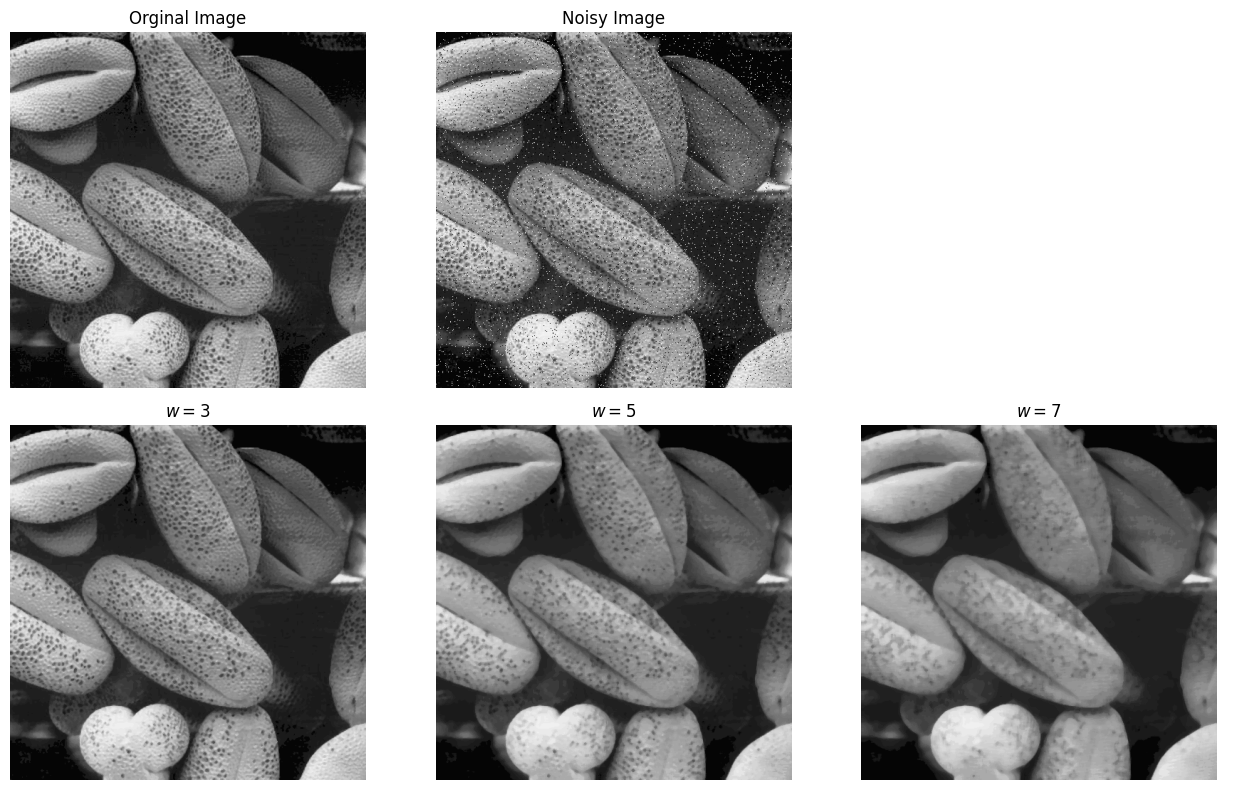

In [90]:
fig, axs = plt.subplots(2, 3, figsize=(13, 8))

axs[0,0].set_title('Orginal Image')
axs[0,0].imshow(image, cmap='gray', vmin=0, vmax=1)
axs[0,1].set_title('Noisy Image')
axs[0,1].imshow(image_noisy, cmap='gray', vmin=0, vmax=1)

for w, ax in zip([3, 5, 7], axs[1]):
    ax.set_title(f'$w = {w}$')
    ax.imshow(ex4_rank_filter(image_noisy, w, median_filter), cmap='gray', vmin=0, vmax=1)

for ax in axs.ravel():
    ax.axis('off')
fig.tight_layout()
plt.show()

Testen sie verschiedene Filtergrößen ($3 \times 3, 5 \times 5, \dots$) und interpretieren sie die Ergebnisse!

Was bewirken die verschiedenen Rangordnungsoperatoren jeweils?

Für $w=3$ kann mann sehen, dass ein Medianfilter dieser Größe für diese Menge an Salt-and-Pepper-Rauschen nicht ausreicht um alles zu eliminieren. Nimmt man jedoch einen größeren Filter, siehe $w=7$ gehen Details und Ecken im Bild verloren.